 

# Project: Investigate the Correlation of Sugar Consumption with Body Mass Index, Blood Pressure and Life Expectancy

Malina Morin

Western Governors University

Student #00734946

mmori12@wgu.edu


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data selected for the analysis is chosen from the data set options Gapminder World and obtained from the website https://www.gapminder.org/data/.  

Is sugar truly bad for us? With so many trend diets eliminating sugar and other sweeteners, I want to find out if Sugar Consumption correlates with general health. I won't be able to find out if sugar is truly bad for us because of the limitations of the data. However, I want to know if the consumption of sugar and other sweeteners affects can be correlated with indicators of general health. When sugar and other sweeteners consumption goes up, do the indicators of gerneral health increase, as well? ...or do they decrease? When sugar consumption and other sweeteners goes down what happens with the indicators of general health?



>Three indicators of general health I chose are Systolic Blood Pressure, Body Mass Index and Life Expectancy. 

One Dependant Variable:
>Sugar Comsumption is represented by grams per day per person of sugar and other sweeteners. 

Three Independant Variables:
>Systolic Blood Pressure(SBP) is the pressure the heart exerts on the blood against the walls of the arteries and blood vessels when the heart contracts. SBP is measured in mm Hg - milimeters of Mercury. The higher the SBP the harder the heart must work to pump blood. The accepted normal range in the United States for SBP is between 120 and 140. Dangerously low is widely accepted as 90 and below. 

>Body Mass Index is the weight to height ratio of the body. BMI is universally expressed in kilograms per square meter. The higher the BMI the larger the person. The accepted normal range for healthy weight to height ratio is between 18 and 25. Under 18 is considered underweight and over 24 is considered obese.

>>The Systolic Blood Pressure and Body Mass Index Indicators are calculated as if each country has the same mean age composition as the world population. 

>Life Expectancy is expressed in years and was collected by Gapminder from various sources. Specific details on Life Expectancy are not given by Gapminder.
>


In [45]:
# import statements for all packages planned to use.
from datetime import datetime as dt
import unicodecsv
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis. 

### General Properties

The following cell loads the data from the .csv files using Pandas. In addition, it shows which directory I am working.

In [46]:
# Load data with Pandas

print ("The directory I am working in is: {}".format(os.getcwd()))
sugar_consum = pd.read_csv('sugar_consum.csv', dtype={} ).set_index('Unnamed: 0')
life_expectancy = pd.read_csv('life_expectancy.csv').set_index('Life expectancy')
sbp_male = pd.read_csv('sbp_male.csv').set_index('SBP male (mm Hg), age standardized mean')
sbp_female = pd.read_csv('sbp_female.csv').set_index('SBP female (mm Hg), age standardized mean')
bmi_male = pd.read_csv('bmi_male.csv').set_index('Country')
bmi_female = pd.read_csv('bmi_female.csv').set_index('Country')

The directory I am working in is: /Users/malinamorin


The data frames are loaded. I will perform operations in the following cells to inspect the data types and look for missing and errant data.

In [47]:
#Using the method head, I will print out the first two rows of each of the data frames.
sugar_consum.head(2)

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,1996,1997,1998,1999,2000,2001,2002,2003,2004,Unnamed: 45
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#Using the method info, I will inspect the data for data types, index type, number of columns and 
#memory usage for each of the data frames.
sugar_consum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, Abkhazia to nan
Data columns (total 45 columns):
1961           155 non-null float64
1962           155 non-null float64
1963           155 non-null float64
1964           155 non-null float64
1965           155 non-null float64
1966           155 non-null float64
1967           155 non-null float64
1968           155 non-null float64
1969           155 non-null float64
1970           155 non-null float64
1971           155 non-null float64
1972           155 non-null float64
1973           155 non-null float64
1974           155 non-null float64
1975           155 non-null float64
1976           155 non-null float64
1977           155 non-null float64
1978           155 non-null float64
1979           155 non-null float64
1980           155 non-null float64
1981           155 non-null float64
1982           155 non-null float64
1983           155 non-null float64
1984           155 non-null float64
1985           155 non-null f

In [49]:
life_expectancy.head(2)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72


In [50]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, Abkhazia to nan
Columns: 217 entries, 1800 to 2016
dtypes: float64(217)
memory usage: 1.7+ MB


In [51]:
sbp_male.head(2)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
"SBP male (mm Hg), age standardized mean",,,,,,,,,,,,,,,,,,,,,
Afghanistan,125.1991,125.2157,125.2491,125.3090,125.3442,125.3584,125.4051,125.4011,125.3434,125.2586,...,124.5021,124.5272,124.5751,124.7101,124.8847,125.0410,125.2112,125.3705,125.5242,125.6672
Albania,132.9270,133.0296,133.1459,133.1868,133.2048,133.2577,133.2506,133.2931,133.2701,133.2469,...,131.8057,131.9823,132.2176,132.4619,132.7057,132.9587,133.1678,133.3954,133.6220,133.8207


In [52]:
sbp_male.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, Afghanistan to Zimbabwe
Data columns (total 29 columns):
1980    199 non-null float64
1981    199 non-null float64
1982    199 non-null float64
1983    199 non-null float64
1984    199 non-null float64
1985    199 non-null float64
1986    199 non-null float64
1987    199 non-null float64
1988    199 non-null float64
1989    199 non-null float64
1990    199 non-null float64
1991    199 non-null float64
1992    199 non-null float64
1993    199 non-null float64
1994    199 non-null float64
1995    199 non-null float64
1996    199 non-null float64
1997    199 non-null float64
1998    199 non-null float64
1999    199 non-null float64
2000    199 non-null float64
2001    199 non-null float64
2002    199 non-null float64
2003    199 non-null float64
2004    199 non-null float64
2005    199 non-null float64
2006    199 non-null float64
2007    199 non-null float64
2008    199 non-null float64
dtypes: float64(29)
memory usage: 46.6+ KB


In [53]:
sbp_female.head(2)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
"SBP female (mm Hg), age standardized mean",,,,,,,,,,,,,,,,,,,,,
Afghanistan,122.0799,122.2677,122.4872,122.7061,122.9095,123.0919,123.2892,123.4189,123.5137,123.5832,...,123.9363,124.0053,124.0746,124.2085,124.3654,124.5190,124.6693,124.8126,124.9512,125.0857
Albania,132.2048,132.1113,132.0324,131.9356,131.8073,131.6686,131.5425,131.3945,131.2248,131.0970,...,128.9691,128.9903,129.0310,129.0609,129.0753,129.1085,129.1311,129.1600,129.1707,129.1636


In [54]:
sbp_female.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, Afghanistan to Zimbabwe
Data columns (total 29 columns):
1980    199 non-null float64
1981    199 non-null float64
1982    199 non-null float64
1983    199 non-null float64
1984    199 non-null float64
1985    199 non-null float64
1986    199 non-null float64
1987    199 non-null float64
1988    199 non-null float64
1989    199 non-null float64
1990    199 non-null float64
1991    199 non-null float64
1992    199 non-null float64
1993    199 non-null float64
1994    199 non-null float64
1995    199 non-null float64
1996    199 non-null float64
1997    199 non-null float64
1998    199 non-null float64
1999    199 non-null float64
2000    199 non-null float64
2001    199 non-null float64
2002    199 non-null float64
2003    199 non-null float64
2004    199 non-null float64
2005    199 non-null float64
2006    199 non-null float64
2007    199 non-null float64
2008    199 non-null float64
dtypes: float64(29)
memory usage: 46.6+ KB


In [55]:
bmi_male.head(2)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,21.48678,21.46552,21.45145,21.43822,21.42734,21.41222,21.40132,21.37679,21.34018,21.29845,...,20.75469,20.69521,20.62643,20.59848,20.58706,20.57759,20.58084,20.58749,20.60246,20.62058
Albania,25.22533,25.23981,25.25636,25.27176,25.27901,25.28669,25.29451,25.30217,25.30450,25.31944,...,25.46555,25.55835,25.66701,25.77167,25.87274,25.98136,26.08939,26.20867,26.32753,26.44657


In [56]:
bmi_male.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, Afghanistan to Zimbabwe
Data columns (total 29 columns):
1980    199 non-null float64
1981    199 non-null float64
1982    199 non-null float64
1983    199 non-null float64
1984    199 non-null float64
1985    199 non-null float64
1986    199 non-null float64
1987    199 non-null float64
1988    199 non-null float64
1989    199 non-null float64
1990    199 non-null float64
1991    199 non-null float64
1992    199 non-null float64
1993    199 non-null float64
1994    199 non-null float64
1995    199 non-null float64
1996    199 non-null float64
1997    199 non-null float64
1998    199 non-null float64
1999    199 non-null float64
2000    199 non-null float64
2001    199 non-null float64
2002    199 non-null float64
2003    199 non-null float64
2004    199 non-null float64
2005    199 non-null float64
2006    199 non-null float64
2007    199 non-null float64
2008    199 non-null float64
dtypes: float64(29)
memory usage: 46.6+ KB


In [57]:
bmi_female.head(2)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,20.44348,20.47765,20.52292,20.56493,20.60867,20.64796,20.68983,20.70902,20.71512,20.71421,...,20.61717,20.61850,20.61353,20.65274,20.70828,20.76927,20.83858,20.91021,20.99060,21.07402
Albania,25.17427,25.19088,25.20032,25.21906,25.22359,25.21257,25.20939,25.18918,25.16965,25.15370,...,25.06254,25.12797,25.20332,25.27082,25.33198,25.39804,25.46525,25.53328,25.59394,25.65726


In [58]:
bmi_female.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, Afghanistan to Zimbabwe
Data columns (total 29 columns):
1980    199 non-null float64
1981    199 non-null float64
1982    199 non-null float64
1983    199 non-null float64
1984    199 non-null float64
1985    199 non-null float64
1986    199 non-null float64
1987    199 non-null float64
1988    199 non-null float64
1989    199 non-null float64
1990    199 non-null float64
1991    199 non-null float64
1992    199 non-null float64
1993    199 non-null float64
1994    199 non-null float64
1995    199 non-null float64
1996    199 non-null float64
1997    199 non-null float64
1998    199 non-null float64
1999    199 non-null float64
2000    199 non-null float64
2001    199 non-null float64
2002    199 non-null float64
2003    199 non-null float64
2004    199 non-null float64
2005    199 non-null float64
2006    199 non-null float64
2007    199 non-null float64
2008    199 non-null float64
dtypes: float64(29)
memory usage: 46.6+ KB


>

### Data Cleaning

In the preceding cells, there are some vacancies that will need to be removed and I will need to trim and clean the data in several ways. 
>
First, because the dataset with which I am working separates male and female SBP(Systolic Blood Pressure) and BMI(Body Mass Index), I will combine the male and female datasets for each. This is mainly because the Sugar Consumption dataset does not separate the consumers by male and female nor does the Life Expectancy dataset.
>
Additionally, changing all of the values to integers affords a more readable and easy to understand analysis for this heuristic.
>
Next, I would like to make sure the countries are consistantly represented in all of the data frames. If a county has no data in any one dataset, I will remove the country from the analysis for consistancy. For example, the Sugar Consumption and Life Expectancy data sets have no data for the county Abkhazia. In addition, the other 4 data sets do not even list that country. Abkhazia will be removed from the analysis. Conversely, all of the data sets contain data for Afghanistan so that country will be used in the analysis.  
> 
Finally, I will trim the years for a relavant and modern representation. Unfortunately, the data for Sugar Consumption only goes up to 2004. That will be where I trim the top end of the years for all of the dataframes. The bottom end will be trimmed at 1980. 1980 was chosen because that is where the data for BMI and SBP starts. Thus providing a 24 year time span.

>In the following cells, the sbp_male and sbp_female data frames are combined by taking the mean of each and every value to create a new data frame that represent both male and female Systolic Blood Presure. In other words, the new data frame "sbp_mean" is a combined representation of the Systolic Blood Presure for both men and women.

In [59]:
#Use vecotorized operation to add each of the cells from the data frames male and female and divide by two, 
#thus, finding the mean value and creating a new data frame with those values. 
sbp_mean = pd.DataFrame(sbp_male + sbp_female)/2

In [60]:
sbp_mean.dropna()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
"SBP male (mm Hg), age standardized mean",,,,,,,,,,,,,,,,,,,,,
Afghanistan,123.63950,123.74170,123.86815,124.00755,124.12685,124.22515,124.34715,124.41000,124.42855,124.42090,...,124.21920,124.26625,124.32485,124.45930,124.62505,124.78000,124.94025,125.09155,125.23770,125.37645
Albania,132.56590,132.57045,132.58915,132.56120,132.50605,132.46315,132.39655,132.34380,132.24745,132.17195,...,130.38740,130.48630,130.62430,130.76140,130.89050,131.03360,131.14945,131.27770,131.39635,131.49215
Algeria,131.62135,131.53945,131.47195,131.39460,131.33385,131.25980,131.16235,131.05735,130.92560,130.80840,...,129.81240,129.83555,129.86565,129.90405,129.95080,129.96945,129.99735,130.01150,129.99135,129.97460
Andorra,138.73125,138.04030,137.34190,136.63175,135.94175,135.29480,134.73530,134.26870,133.86675,133.50045,...,129.63340,129.26160,128.91710,128.58635,128.25785,127.93695,127.62180,127.32005,127.00905,126.69470
Angola,132.63285,132.41890,132.21965,132.03215,131.89565,131.79935,131.71830,131.68360,131.70310,131.72885,...,131.13070,131.15355,131.19535,131.26290,131.32080,131.39530,131.49445,131.61295,131.73875,131.85450
Antigua and Barbuda,129.12170,129.03280,128.94265,128.89140,128.85505,128.82925,128.83095,128.83885,128.87985,128.87010,...,128.20340,128.24415,128.30710,128.39285,128.50710,128.63940,128.76925,128.96295,129.17800,129.38365
Argentina,128.01775,127.66175,127.25995,126.88165,126.51360,126.12330,125.78985,125.49105,125.21820,124.88800,...,123.36915,123.32245,123.30785,123.27355,123.25870,123.29160,123.34775,123.44450,123.57185,123.69785
Armenia,136.36365,136.27085,136.16350,136.04545,135.91115,135.76370,135.62345,135.48860,135.35720,135.23455,...,133.12675,133.11485,133.15650,133.24600,133.33455,133.45010,133.62910,133.79625,133.93245,134.04565
Australia,131.52300,131.26490,130.98815,130.69310,130.42395,130.17985,129.97480,129.79400,129.61670,129.43105,...,126.46465,126.04930,125.61580,125.15005,124.66885,124.18765,123.71510,123.23500,122.75490,122.28100


In [61]:
#Changing values for sbp_mean dataframe to integers
sbp_mean = sbp_mean.astype(int, errors='ignore')

In [62]:
#Change name of index
sbp_mean.rename_axis('Country', inplace=True)

In [63]:
sbp_mean.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,123,123,123,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,125,125,125
Albania,132,132,132,132,132,132,132,132,132,132,...,130,130,130,130,130,131,131,131,131,131
Algeria,131,131,131,131,131,131,131,131,130,130,...,129,129,129,129,129,129,129,130,129,129
Andorra,138,138,137,136,135,135,134,134,133,133,...,129,129,128,128,128,127,127,127,127,126
Angola,132,132,132,132,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131


>In the preceding cells, four things took place:
1. The NaN (Not a Number) values were removed
2. A new data frame was formed called "sbp_mean" combining two data frames previously separated by gender.
3. The index is now named "Country". (This will help me in the future cells to narrow down the countries to only those shared by all the data frames)
4. All of the values are now integers affording easier readabilty.

>In the following cells, the bmi_male and bmi_female data frames are combined by taking the mean of each and every value to create a new data frame that represent both male and female Body Mass Indexes. In other words, the new data frame "bmi_mean" is a combined representation of the Body Mass Index for both men and women.

>I already changed the name of the index to "Country" for the following two data frames when I innitially loaded the data but I still need to remove the NaN's and change the data types to integers like I did for "sbp_mean".

In [64]:
bmi_mean = pd.DataFrame(bmi_male + bmi_female)/2

In [65]:
bmi_mean.dropna()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,20.965130,20.971585,20.987185,21.001575,21.018005,21.030090,21.045575,21.042905,21.027650,21.006330,...,20.685930,20.656855,20.619980,20.625610,20.647670,20.673430,20.709710,20.748850,20.796530,20.847300
Albania,25.199800,25.215345,25.228340,25.245410,25.251300,25.249630,25.251950,25.245675,25.237075,25.236570,...,25.264045,25.343160,25.435165,25.521245,25.602360,25.689700,25.777320,25.870975,25.960735,26.051915
Algeria,22.967335,23.077235,23.181365,23.278545,23.371315,23.468570,23.553155,23.633095,23.707740,23.786835,...,24.548125,24.635240,24.728665,24.826210,24.932055,25.045190,25.154435,25.266620,25.374710,25.482305
Andorra,25.669880,25.699430,25.723015,25.741695,25.762290,25.780565,25.801640,25.829255,25.865000,25.910495,...,26.412550,26.469005,26.535400,26.610335,26.681865,26.759790,26.825370,26.902170,26.967290,27.031220
Angola,20.508195,20.535685,20.566090,20.598130,20.638395,20.687405,20.737095,20.794770,20.861600,20.930710,...,21.540040,21.643865,21.756550,21.889290,22.022475,22.163770,22.319880,22.491435,22.676460,22.867570
Antigua and Barbuda,23.768295,23.865485,23.949080,24.047350,24.170035,24.296510,24.431930,24.560215,24.702565,24.845100,...,25.722605,25.801945,25.871980,25.946585,26.027560,26.131410,26.248995,26.373300,26.508055,26.635735
Argentina,24.611745,24.705950,24.784025,24.861775,24.943740,25.023205,25.108675,25.197320,25.280810,25.350715,...,26.557875,26.679770,26.785740,26.851710,26.930620,27.021290,27.125285,27.237255,27.357485,27.483465
Armenia,24.800980,24.846845,24.900295,24.954895,25.008170,25.052020,25.104490,25.154630,25.195265,25.215185,...,25.084035,25.153595,25.246050,25.356680,25.486050,25.617110,25.770850,25.926375,26.088685,26.244810
Australia,24.278935,24.380795,24.479930,24.571120,24.671545,24.781845,24.886225,24.994195,25.101720,25.217260,...,26.295135,26.393265,26.497900,26.599075,26.703380,26.805245,26.909625,27.015065,27.118985,27.220750


In [66]:
#Changing values for bmi_mean data frame to integers
bmi_mean = bmi_mean.astype(int, errors='ignore')

In [67]:
bmi_mean.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,20,20,20,21,21,21,21,21,21,21,...,20,20,20,20,20,20,20,20,20,20
Albania,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,26
Algeria,22,23,23,23,23,23,23,23,23,23,...,24,24,24,24,24,25,25,25,25,25
Andorra,25,25,25,25,25,25,25,25,25,25,...,26,26,26,26,26,26,26,26,26,27
Angola,20,20,20,20,20,20,20,20,20,20,...,21,21,21,21,22,22,22,22,22,22


>The new data frames "sbp_mean" and "bmi_mean" are now complete with new and comparable indexes and data types.

>In the next cells, the data frame sugar_consum will have the values NaN or "not a number" filled with zeroes in order to change the data types to integers and it's index will also be renamed to "Country".

In [68]:
#Changing values for sbp_mean dataframe to integers
sugar_consum.fillna(0, inplace=True)
sugar_consum = sugar_consum.astype(int, inplace=True)
sugar_consum.rename_axis('Country', inplace=True)
sugar_consum.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,1996,1997,1998,1999,2000,2001,2002,2003,2004,Unnamed: 45
Country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Akrotiri and Dhekelia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,30,30,32,35,35,35,38,38,38,38,...,68,60,60,57,65,68,71,65,65,0
Algeria,46,49,46,49,46,46,49,49,46,43,...,73,79,54,60,82,79,82,84,84,0


>The sugar_consum data frame has the data types integer for it's values and "Country" for it's index and I will do the same for the life_expectancy data frame in the following cells.

In [69]:
#Change name of index
life_expectancy.rename_axis('Country', inplace=True)

In [70]:
#Changing values for life_expectancy dataframe to integers
life_expectancy.fillna(0, inplace=True)
life_expectancy = life_expectancy.astype(int, inplace=True)
life_expectancy.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Afghanistan,28,28,28,28,28,28,28,28,28,28,...,52,52,53,53,54,54,54,54,53,52
Akrotiri and Dhekelia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,35,35,35,35,35,35,35,35,35,35,...,76,76,77,77,77,77,77,77,78,78
Algeria,28,28,28,28,28,28,28,28,28,28,...,75,75,75,76,76,76,76,76,76,76


>>The sugar_consum and life_expectancy data frame still need vacancies removed. In the following cells, the rows containing all zeroes will be removed. 

In [71]:
#This removes all of the rows that contain only zeroes
sugar_consum = sugar_consum.loc[(sugar_consum !=0).any(1)]
sugar_consum.index

Index([u'Albania', u'Algeria', u'Angola', u'Antigua and Barbuda', u'Argentina',
       u'Armenia', u'Australia', u'Austria', u'Azerbaijan', u'Bahamas',
       ...
       u'USSR', u'Uzbekistan', u'Vanuatu', u'Venezuela', u'West Bank and Gaza',
       u'Vietnam', u'Yemen, Rep.', u'Yugoslavia', u'Zambia', u'Zimbabwe'],
      dtype='object', name=u'Country', length=179)

In [72]:
#This removes all of the rows that contain only zeros
life_expectancy = life_expectancy.loc[(life_expectancy !=0).any(1)]
life_expectancy.index

Index([u'Afghanistan', u'Albania', u'Algeria', u'American Samoa', u'Andorra',
       u'Angola', u'Antigua and Barbuda', u'Argentina', u'Armenia', u'Aruba',
       ...
       u'Venezuela', u'West Bank and Gaza', u'Western Sahara', u'Vietnam',
       u'Virgin Islands (U.S.)', u'Yemen', u'Zambia', u'Zimbabwe', u'Åland',
       u'South Sudan'],
      dtype='object', name=u'Country', length=210)

Now that all of the obsolete rows are removed, I will replace all of the zeroes in each of the data frames with the mean of each column. By replacing the values with the mean of the column it changes the data type for the data frame back to a floating point number. So I will also change the data types to integers.

>>It was important to do it this way because the rows containing all zeroes were removed.  Any zeroes remaining could then be replaced with the mean of the column.

In [73]:
sugar_consum.replace(0, sugar_consum.mean(), inplace=True)
sugar_consum.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,1996,1997,1998,1999,2000,2001,2002,2003,2004,Unnamed: 45
Country,,,,,,,,,,,,,,,,,,,,,
Albania,30.0,30.0,32.0,35.0,35.0,35.0,38.0,38.0,38.0,38.0,...,68.0,60.0,60.0,57.0,65.0,68.0,71.0,65.0,65.0,0
Algeria,46.0,49.0,46.0,49.0,46.0,46.0,49.0,49.0,46.0,43.0,...,73.0,79.0,54.0,60.0,82.0,79.0,82.0,84.0,84.0,0
Angola,24.0,30.0,32.0,30.0,30.0,30.0,30.0,35.0,30.0,35.0,...,27.0,32.0,30.0,38.0,27.0,32.0,35.0,35.0,35.0,0
Antigua and Barbuda,95.0,126.0,104.0,106.0,123.0,131.0,131.0,134.0,134.0,136.0,...,90.0,87.0,93.0,90.0,93.0,93.0,93.0,95.0,95.0,0
Argentina,106.0,98.0,73.0,109.0,101.0,106.0,109.0,106.0,106.0,117.0,...,123.0,120.0,117.0,128.0,128.0,128.0,126.0,112.0,112.0,0


In [74]:
sugar_consum = sugar_consum.astype(int, inplace=True)
sugar_consum.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,1996,1997,1998,1999,2000,2001,2002,2003,2004,Unnamed: 45
Country,,,,,,,,,,,,,,,,,,,,,
Albania,30,30,32,35,35,35,38,38,38,38,...,68,60,60,57,65,68,71,65,65,0
Algeria,46,49,46,49,46,46,49,49,46,43,...,73,79,54,60,82,79,82,84,84,0
Angola,24,30,32,30,30,30,30,35,30,35,...,27,32,30,38,27,32,35,35,35,0
Antigua and Barbuda,95,126,104,106,123,131,131,134,134,136,...,90,87,93,90,93,93,93,95,95,0
Argentina,106,98,73,109,101,106,109,106,106,117,...,123,120,117,128,128,128,126,112,112,0


In [75]:
life_expectancy.replace(0, life_expectancy.mean(), inplace=True)
life_expectancy.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,52.0,52.0,53.0,53.0,54.0,54.0,54.0,54.0,53.0,52.0
Albania,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,76.0,76.0,77.0,77.0,77.0,77.0,77.0,77.0,78.0,78.0
Algeria,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,75.0,75.0,75.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0
American Samoa,29.714286,29.680952,29.704762,29.609524,29.671429,29.790476,29.847619,29.804762,29.619048,29.552381,...,72.0,72.0,71.0,72.0,72.0,72.0,72.0,72.0,72.0,73.0
Andorra,29.714286,29.680952,29.704762,29.609524,29.671429,29.790476,29.847619,29.804762,29.619048,29.552381,...,84.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0


In [76]:
life_expectancy = life_expectancy.astype(int, inplace=True)
life_expectancy.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28,28,28,28,28,28,28,28,28,28,...,52,52,53,53,54,54,54,54,53,52
Albania,35,35,35,35,35,35,35,35,35,35,...,76,76,77,77,77,77,77,77,78,78
Algeria,28,28,28,28,28,28,28,28,28,28,...,75,75,75,76,76,76,76,76,76,76
American Samoa,29,29,29,29,29,29,29,29,29,29,...,72,72,71,72,72,72,72,72,72,73
Andorra,29,29,29,29,29,29,29,29,29,29,...,84,84,84,84,84,84,84,84,84,84


>Now that the data frames have the same indexes and the vacancies are removed, I can compare the indexes an eliminate the countries that are not in all of the data frames.

In [77]:
#Reduce the data frames using inner merge to identify the countries shared by all datasets
dfs = [sugar_consum, life_expectancy, sbp_mean, bmi_mean]
reduced_df = reduce(lambda left,right: pd.merge(left, right, on='Country', how='inner'), dfs)
country_list = list(reduced_df.index)
country_list

['Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhs

In [78]:
#length of list
len(country_list)

162

>This outputs a list of all of the countries shared in each of the data set. Using this list and the method loc, I can remove the countries and years obsolete to this investigation.

In [79]:
sbp = pd.DataFrame(sbp_mean.loc[country_list, '1980':'2004'])
sbp.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
Country,,,,,,,,,,,,,,,,,,,,,
Albania,132,132,132,132,132,132,132,132,132,132,...,130,130,130,130,130,130,130,130,130,131
Algeria,131,131,131,131,131,131,131,131,130,130,...,129,129,129,129,129,129,129,129,129,129
Angola,132,132,132,132,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131
Antigua and Barbuda,129,129,128,128,128,128,128,128,128,128,...,128,128,128,128,128,128,128,128,128,128
Argentina,128,127,127,126,126,126,125,125,125,124,...,123,123,123,123,123,123,123,123,123,123


In [80]:
bmi = pd.DataFrame(bmi_mean.loc[country_list, '1980':'2004'])
bmi.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
Country,,,,,,,,,,,,,,,,,,,,,
Albania,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
Algeria,22,23,23,23,23,23,23,23,23,23,...,24,24,24,24,24,24,24,24,24,25
Angola,20,20,20,20,20,20,20,20,20,20,...,21,21,21,21,21,21,21,21,22,22
Antigua and Barbuda,23,23,23,24,24,24,24,24,24,24,...,25,25,25,25,25,25,25,25,26,26
Argentina,24,24,24,24,24,25,25,25,25,25,...,26,26,26,26,26,26,26,26,26,27


In [81]:
sugar = pd.DataFrame(sugar_consum.loc[country_list, '1980':'2004'])
sugar.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
Country,,,,,,,,,,,,,,,,,,,,,
Albania,46,46,46,46,46,46,49,49,49,49,...,54,68,60,60,57,65,68,71,65,65
Algeria,82,82,73,82,82,79,84,93,79,84,...,73,73,79,54,60,82,79,82,84,84
Angola,43,35,32,30,30,30,30,30,30,32,...,24,27,32,30,38,27,32,35,35,35
Antigua and Barbuda,104,115,93,84,76,79,79,68,82,84,...,90,90,87,93,90,93,93,93,95,95
Argentina,109,101,101,109,112,112,115,106,101,101,...,128,123,120,117,128,128,128,126,112,112


In [82]:
life = pd.DataFrame(life_expectancy.loc[country_list, '1980':'2004'])
life.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
Country,,,,,,,,,,,,,,,,,,,,,
Albania,71,71,71,72,72,72,72,73,73,73,...,73,73,74,74,74,74,75,75,75,75
Algeria,60,62,63,64,66,67,68,68,69,69,...,71,72,72,72,73,73,73,73,73,74
Angola,46,46,46,46,47,47,47,47,48,48,...,50,51,51,51,51,52,52,53,53,54
Antigua and Barbuda,70,70,71,71,71,72,72,72,72,73,...,73,73,73,74,74,73,74,74,74,74
Argentina,70,70,70,71,71,71,71,71,72,72,...,73,73,73,73,73,74,74,74,74,75


>>Equipted with four cleaned and trimmed data frames, I can now move on to the Exploratory Data Analysis.

<a id='eda'></a>
## Exploratory Data Analysis

>
### Research Question  
When sugar and other sweeteners consumption goes up, what happens with the three indicators of general health?

First, I wanted to look at whether each of the four variables rise and fall consistantly among each of the countries. Below are the scatter plots for each of the four variables comparing the countries to one another over time. 

In [83]:
sugar.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
count,162.00000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,...,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,76.41358,75.660494,75.395062,75.765432,74.932099,74.530864,75.635802,75.728395,75.117284,75.320988,...,76.129630,78.086420,78.919753,78.697531,78.851852,80.567901,80.814815,81.333333,81.771605,81.771605
std,42.27456,41.762143,42.048827,42.022701,41.839107,41.565808,41.813362,42.602748,42.440369,42.154501,...,44.626001,44.839312,45.555505,44.814468,44.882486,45.648791,45.388074,45.305588,45.234966,45.234966
min,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,...,2.000000,5.000000,2.000000,5.000000,5.000000,2.000000,5.000000,5.000000,5.000000,5.000000
25%,46.00000,49.750000,49.750000,49.750000,47.500000,43.750000,42.250000,46.000000,43.750000,44.500000,...,32.750000,38.750000,38.000000,38.000000,38.000000,41.000000,38.000000,38.750000,41.000000,41.000000
50%,71.00000,73.000000,73.000000,72.000000,72.000000,74.500000,73.000000,72.000000,73.000000,72.000000,...,80.500000,84.000000,83.000000,84.000000,82.000000,84.000000,84.000000,87.000000,87.000000,87.000000
75%,108.25000,103.250000,106.000000,104.000000,104.000000,106.000000,109.000000,108.250000,105.500000,104.000000,...,112.000000,109.000000,112.000000,109.000000,112.000000,115.000000,115.000000,114.250000,114.250000,114.250000
max,178.00000,189.000000,178.000000,186.000000,189.000000,186.000000,180.000000,186.000000,169.000000,167.000000,...,183.000000,186.000000,194.000000,194.000000,189.000000,194.000000,194.000000,194.000000,191.000000,191.000000


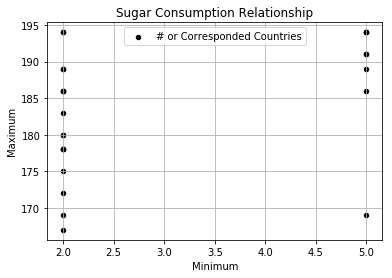

In [132]:
sugar.describe().T.plot(kind='scatter', color='k', label='# or Corresponded Countries', x='min', y='max').set_title('Sugar Consumption Relationship')
plt.xlabel('Minimum')
plt.ylabel('Maximum')
plt.grid(True)
plt.legend(loc='upper center')

>There is no correlation between countries with sugar consumption.  In other words, when sugar consumption in one county goes up, the figures shows, it doesn't necessarily go up in all of the countries at the same time. 



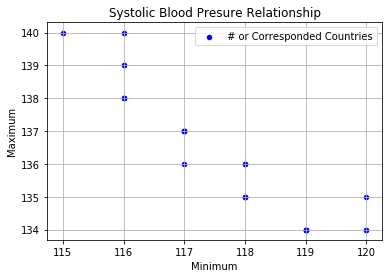

In [134]:
sbp.describe().T.plot(kind='scatter', color='b', label='# or Corresponded Countries', x='min', y='max').set_title('Systolic Blood Presure Relationship')
plt.xlabel('Minimum')
plt.ylabel('Maximum')
plt.grid(True)
plt.legend(loc='best')

>>Systolic blood presure seems to have fallen over the time span of 1980 to 2004 in the 162 countries at a steady rate among all of the countries.  

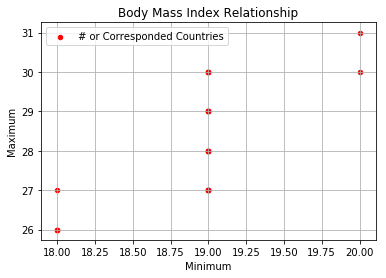

In [135]:
bmi.describe().T.plot(kind='scatter', color='r', label='# or Corresponded Countries', x='min', y='max').set_title('Body Mass Index Relationship')
plt.xlabel('Minimum')
plt.ylabel('Maximum')
plt.grid(True)
plt.legend(loc='best')

>>Meanwhile, Body Mass Index has increased steadily among the 162 countries at the same time. 

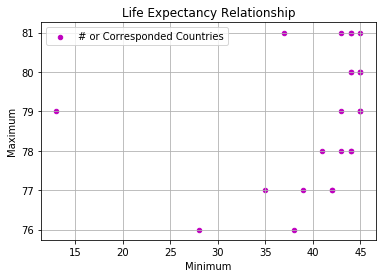

In [136]:
life.describe().T.plot(kind='scatter', color='m', label='# or Corresponded Countries', x='min', y='max').set_title('Life Expectancy Relationship')
plt.xlabel('Minimum')
plt.ylabel('Maximum')
plt.grid(True)
plt.legend(loc='upper left')

>The Life Expectancy figure shows no correlation among the countries either.

>>The following cells show line graphs for the four variables. 

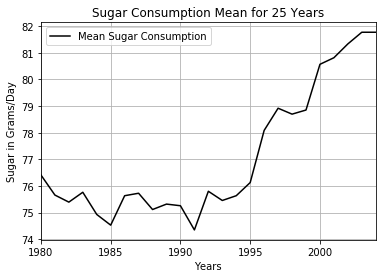

In [138]:
sugar.mean().T.plot(kind='line', label='Mean Sugar Consumption', color='k').set_title('Sugar Consumption Mean for 25 Years')
plt.xlabel('Years')
plt.ylabel('Sugar in Grams/Day')
plt.grid(True)
plt.legend()

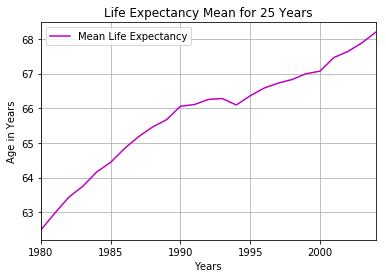

In [139]:
life.mean().T.plot(kind='line', color='m', label='Mean Life Expectancy').set_title('Life Expectancy Mean for 25 Years')
plt.xlabel('Years')
plt.ylabel('Age in Years')
plt.grid(True)
plt.legend()

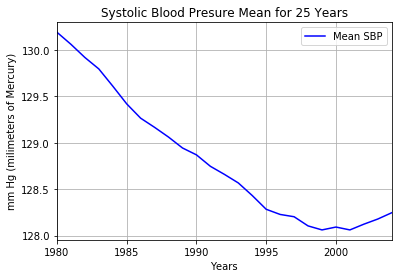

In [140]:
sbp.mean().T.plot(kind='line', color='b', label='Mean SBP').set_title('Systolic Blood Presure Mean for 25 Years')
plt.xlabel('Years')
plt.ylabel('mm Hg (milimeters of Mercury)')
plt.grid(True)
plt.legend()

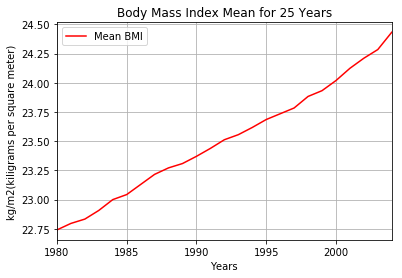

In [141]:
bmi.mean().T.plot(kind='line', color='r', label='Mean BMI').set_title('Body Mass Index Mean for 25 Years')
plt.xlabel('Years')
plt.ylabel('kg/m2(kiligrams per square meter)')
plt.grid(True)
plt.legend()

The line graphs show clear direction of each of the variables' means.

>>In the Udacity material, the following cell is how the Pearson's R calculation of correlation is presented. The instructor advises in Lesson 5, Quiz 8 NOT to use this but to use the corrcoef() numpy function.  However, she does not show how to use the corrcoef() numpy function. The links in the lesson were not useful for me to learn how to use the function either. Instead, at the risk of using a less efficient means, I still wanted to find out if and how the three independant variables, Body Mass Index, Systolic Blood Presure and Life Expectancy are correlated with Sugar Consumption. 

In [109]:
#standardize the variables for acurate comparison
def correlate(x, y):
    std_x = (x - x.mean())/ x.std(ddof=0)
    std_y = (y - y.mean())/ y.std(ddof=0)
    
    return (std_x * std_y).mean()

In [110]:
sugar_bmi = correlate(sugar, bmi)
sugar_life = correlate(sugar, life)
sugar_sbp = correlate(sugar, sbp)

In the following figures, the correlation between sugar consumption and each of the independant variables are plotted. 

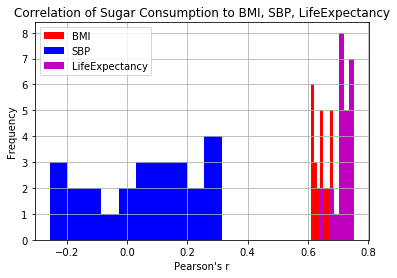

In [128]:
plt.hist(sugar_bmi, color='r', label='BMI', bins=7)# red Body Mass Index
plt.hist(sugar_sbp, color='b', label='SBP', bins=10)# blue Systolic Blood Presure
plt.hist(sugar_life, color='m', label='LifeExpectancy', bins=7)# violet Life Expectancy
plt.title('Correlation of Sugar Consumption to BMI, SBP, LifeExpectancy')
plt.xlabel('Pearson\'s r')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.grid(True)

>>
The figure above shows the relationship between each of the independant variables with Sugar Consumption. As it turns out, Sugar Consumption and Life Expectancy are positively related. As Sugar Consumtion goes up, so does Life Expectancy. Many factors play a part in Life Expectancy, of course. So it is difficult to say that consuming more sugar increases Life Expectancy. However, according to this data, the two correlate positively. 
>>
On the other hand, Sugar Consumption and Systolic Blood Presure are slightly negatively correlated. As Sugar Consumtion went up, Systolic Blood Presure went down. Again, this isn't proof that consuming more sugar reduces blood presure. However, acording to the data there is a slightly negative correlation.
>>
Finally, Sugar Consumption and Body Mass Index are slightly positively correlated. As Sugar Consumption went up so did Body Mass Index. So, acording to the data, consuming sugar is slightly positively correlated to Body Mass Index.

<a id='conclusions'></a>
## Conclusions

> 
>
The results of this heuristic make it unclear whether sugar is truly bad for us. 

<a id='conclusions'></a>
>
#### Results:
The data sugests that:


People have steadily gotten more obese while sugar consumption has risen. Yet meanwhile, Systolic Blood Pressure has fallen and Life Expectancy has increased.

In other words, it was easy to see sugar consumption rose significantly from 1980 to 2004 in the 162 countries selected, as did Body Mass Index. Systolic Blood Pressure fell and Life Expectactancy rose. 


<a id='conclusions'></a>
>
#### Limitations:


The variables chosen do not take into consideration many other factors such as: life expectancy drops significantly during times of war and famine, medication for blood presure, and preference for how to ocupy free time, whether, it is playing video games or going outside to play.   


While this hueristic can describe data, there were no experiments performed nor were any hypothesis created.


Therefore, strong correlations cannot be concluded. 



